In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [40]:
df = pd.read_csv('winequality-red.csv', delimiter = ';')

In [41]:
df['quality'] = df['quality'].apply(lambda x: int(x <= 5))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [42]:
X, y = df.drop(columns=['quality']).to_numpy(), df['quality'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state = 42)

 ### סעיף 1

In [43]:
tree_classifier = DecisionTreeClassifier(max_depth=12, random_state=0)
tree_classifier = tree_classifier.fit(X_train, y_train)


In [44]:
score_train = 100*accuracy_score(y_true=y_train, y_pred=tree_classifier.predict(X_train))
score_test  = 100*accuracy_score(y_true=y_test, y_pred=tree_classifier.predict(X_test))
print(f'Score train is ', score_train)
print(f'Score test is', score_test)

Score train is  98.95724713242961
Score test is 72.8125


 ### סעיף 2 

In [45]:
forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=0)
forest_classifier = forest_classifier.fit(X_train, y_train)

In [46]:
score_train = 100*accuracy_score(y_true=y_train, y_pred=forest_classifier.predict(X_train))
score_test  = 100*accuracy_score(y_true=y_test, y_pred=forest_classifier.predict(X_test))
print(f'Score train is ', score_train)
print(f'Score test is', score_test)

Score train is  99.89572471324296
Score test is 80.15625


In [47]:
test_accuracies = [accuracy_score(y_true=y_test, y_pred=RandomForestClassifier(n_estimators=n, max_depth=12, random_state=0).fit(X_train, y_train).predict(X_test)) for n in range(1, 110, 10)]

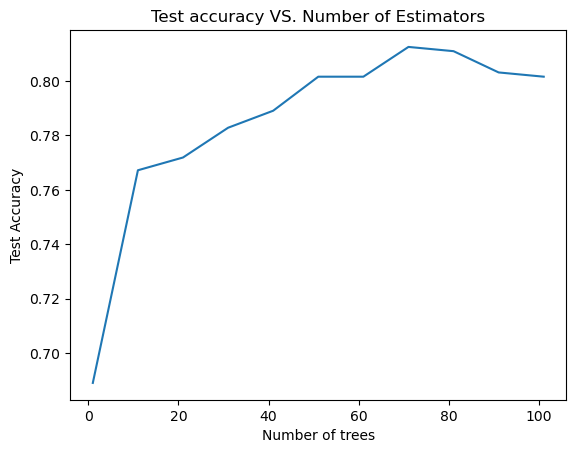

In [48]:
n_estimators = list(range(1, 110, 10))

plt.plot(n_estimators, test_accuracies)
plt.title('Test accuracy VS. Number of Estimators')
plt.xlabel('Number of trees')
plt.ylabel('Test Accuracy')
plt.show()


 ### סעיף 3

In [49]:
forest_classifier_all_f = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=0, max_features=None)
forest_classifier_all_f = forest_classifier_all_f.fit(X_train, y_train)

In [50]:
score_train = 100*accuracy_score(y_true=y_train, y_pred=forest_classifier_all_f.predict(X_train))
score_test  = 100*accuracy_score(y_true=y_test, y_pred=forest_classifier_all_f.predict(X_test))
print(f'Score train is ', score_train)
print(f'Score test is', score_test)

Score train is  99.89572471324296
Score test is 78.59375


In [51]:
test_accuracies = [accuracy_score(y_true=y_test, y_pred=RandomForestClassifier(n_estimators=n, max_depth=12, random_state=0, max_features=None).fit(X_train, y_train).predict(X_test)) for n in range(1, 110, 10)]

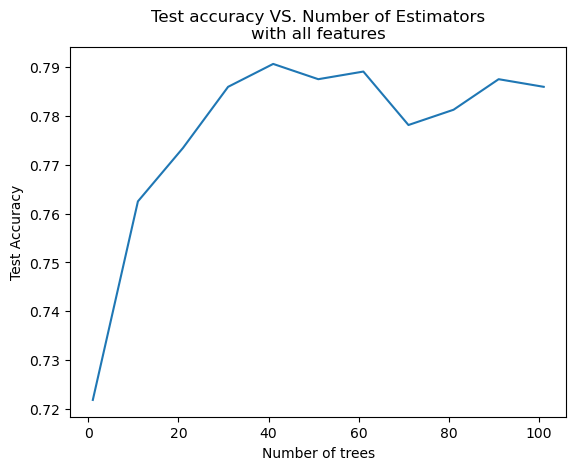

In [52]:
plt.plot(n_estimators, test_accuracies)
plt.title(f'Test accuracy VS. Number of Estimators\nwith all features')
plt.xlabel('Number of trees')
plt.ylabel('Test Accuracy')
plt.show()

###   (a)  סעיף 4

המודל בסעיף ב יותר טוב מכמה סיבות. 
 קודם כל יש לו רמת דיוק על טסט יותר גבוה, וגם כי הוא יותר יציב כלומר משתמש ב100 עצים ודוגם רנדומלית את הפייטורים. 
 

 ###  (b)סעיף 4

המודל בסעיף 3 פחות טוב כי הוא יכול לגרום לבעיה של אוברפיטינג
בגלל שהוא בוחר בכל הפייצרים, יהיה לו רצון יותר גבוה להתאים לסט האימון.

 ### סעיף 5

1 : נבחר את הפיצול הראשון כי הוא מכיל יותר עלים